## Prediction Using Decision Tree Algorithm

Here, we will create a Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classiﬁer, it would be able to predict the right class accordingly.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [4]:
iris=pd.read_csv('Iris.csv',index_col=0)

In [5]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.rename(columns={'SepalLengthCm':'sepal length (cm)','SepalWidthCm':'sepal width (cm)','PetalLengthCm':'petal length (cm)','PetalWidthCm':'petal width (cm)'},inplace=True)

In [7]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Here, 'Species' column represents the categorical features. We need to replace it because our machine learning algorithm won't be able to take in those features as inputs.

In [9]:
iris['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [10]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


## Exploratory Data Analysis

In [11]:
sns.set_style('whitegrid')

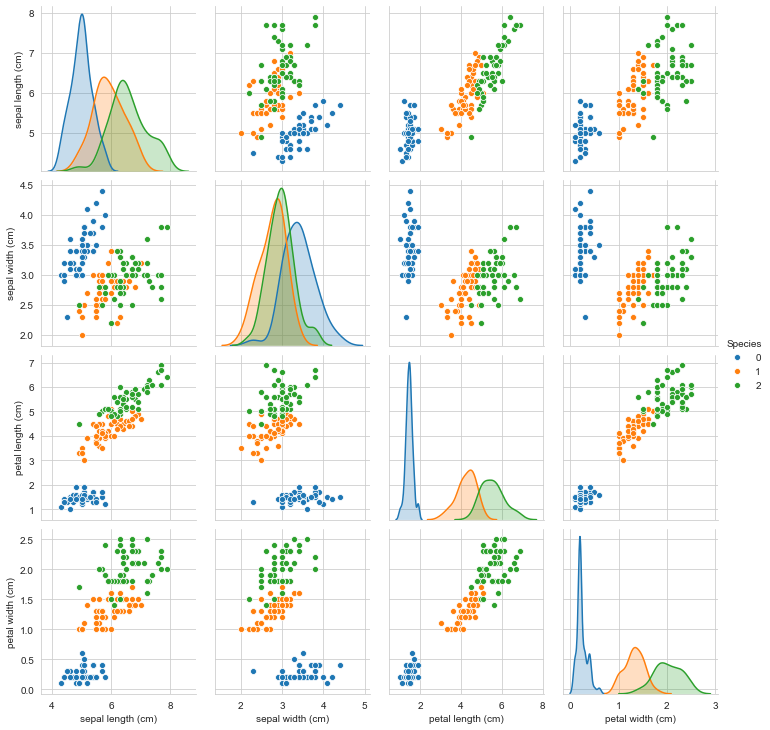

In [12]:
sns.pairplot(iris,hue='Species')

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [37]:
X= iris.drop('Species',axis=1)
y=iris['Species'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Decision Tree

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

**Now, let's fit the model in the Decision Tree Classifier**

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dtree=DecisionTreeClassifier()

In [40]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation

In [41]:
pred=dtree.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [43]:
confusion_matrix(y_test,pred)

array([[14,  0,  0],
       [ 0, 18,  0],
       [ 0,  2, 11]], dtype=int64)

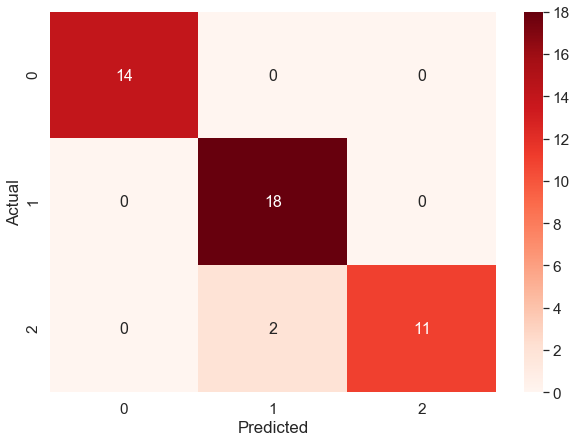

In [60]:
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16})# font size

It means only 2 observations has been classified as false.

In [44]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        14\n           1       0.90      1.00      0.95        18\n           2       1.00      0.85      0.92        13\n\n    accuracy                           0.96        45\n   macro avg       0.97      0.95      0.95        45\nweighted avg       0.96      0.96      0.95        45\n'

The decision tree classifier gave an accuracy of around 95%. Precision, recall and f1-score are above 90% that means the model fitted and predicted very well. 

**Precision** : It tells you what fraction of predictions as a positive class were actually positive.

**Recall** : It tells you what fraction of all positive samples were correctly predicted as positive by the classifier. 

**Specificity** : It tells you what fraction of all negative samples are correctly predicted as negative by the classifier.

**f1-score** : It combines precision and recall into a single measure. Mathematically it’s the harmonic mean of precision and recall.

Now let's compare some of our predicted values with the actual values and see how accurate we were:

In [56]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':pred})
df

,Actual,Predicted
0,2,2
1,1,1
2,1,1
3,1,1
4,2,2
5,0,0
6,1,1
7,0,0
8,1,1
9,1,1


## Tree Visualization

You need to install graphviz and pydotplus before doing this visualization. 

In [45]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [46]:
features=list(iris.columns[:-1])

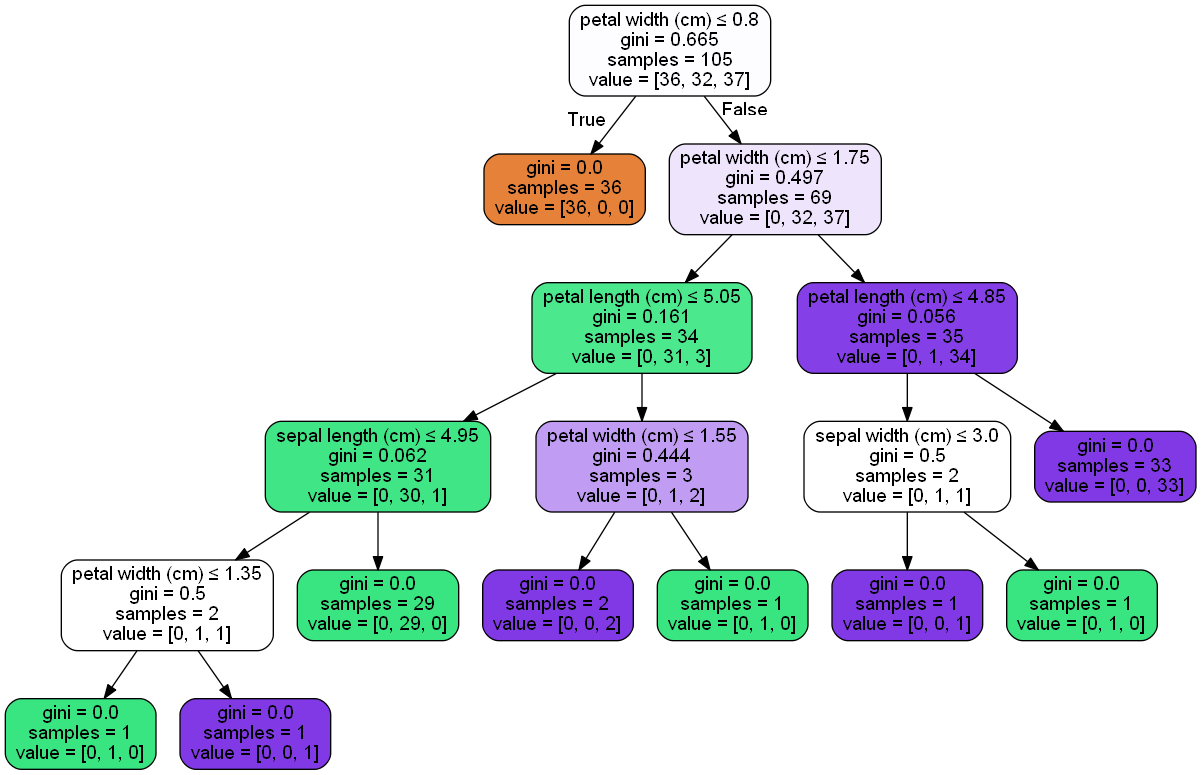

In [47]:
dot_data=StringIO()
export_graphviz(decision_tree=dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

We can now feed any new/test data to this classifer and it would be able to predict the right class accordingly.